# Extracting the R/G/B Channels from an Image File

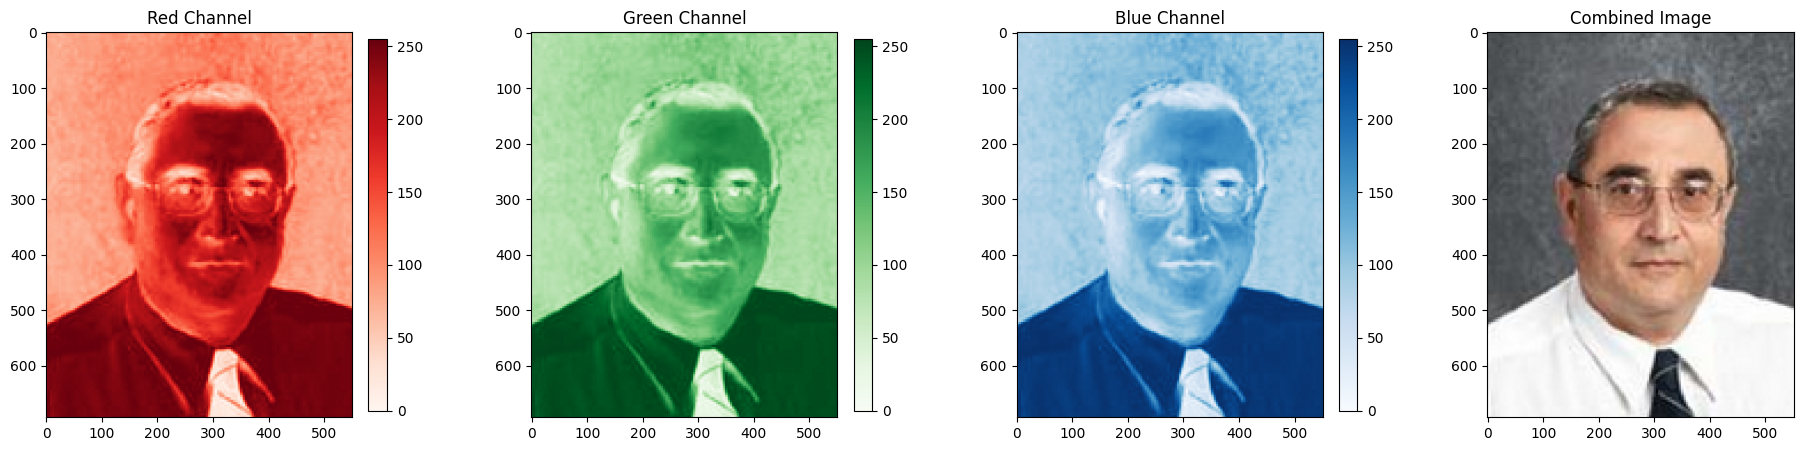

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Open the PNG image
img = Image.open('data/enzopaterno.png')

# Isolate RGB channels from original image converted to RGB
r, g, b = np.array(img.convert('RGB').split())

# Save RGB of image, as it was probably not in RGB before
combined_image = Image.merge('RGB', (Image.fromarray(r), Image.fromarray(g), Image.fromarray(b)))
combined_image.save('data/rgbpaterno.png')

# Store pixel values of each channel
np.savetxt('data/redpaterno.csv', r, fmt='%i')
np.savetxt('data/greenpaterno.csv', g, fmt='%i')
np.savetxt('data/bluepaterno.csv', b, fmt='%i')

# Create a display grid
fig, axs = plt.subplots(1, 4, figsize=(24, 5))

# Display the red channel
red = axs[0].imshow(r, cmap='Reds', vmin=0, vmax=255)
axs[0].set_title('Red Channel')
fig.colorbar(red, ax=axs[0], orientation='vertical', fraction=0.046, pad=0.04)

# Display the green channel
green = axs[1].imshow(g, cmap='Greens', vmin=0, vmax=255)
axs[1].set_title('Green Channel')
fig.colorbar(green, ax=axs[1], orientation='vertical', fraction=0.046, pad=0.04)

# Display the blue channel
blue = axs[2].imshow(b, cmap='Blues', vmin=0, vmax=255)
axs[2].set_title('Blue Channel')
fig.colorbar(blue, ax=axs[2], orientation='vertical', fraction=0.046, pad=0.04)

combined = axs[3].imshow(combined_image)
axs[3].set_title('Combined Image')

# Show the plot
plt.show()


# Calculating SVD of a Matrix

In [2]:
import numpy as np
from numpy.linalg import svd
A = [[1, -1], [-2, 2], [2, -2]]
U, S, V = svd(A)
print(U)
print(S)
print(V)

[[-0.33333333  0.66666667 -0.66666667]
 [ 0.66666667  0.66666667  0.33333333]
 [-0.66666667  0.33333333  0.66666667]]
[4.24264069 0.        ]
[[-0.70710678  0.70710678]
 [ 0.70710678  0.70710678]]


# Low-Rank Approximation of a Grayscale Image

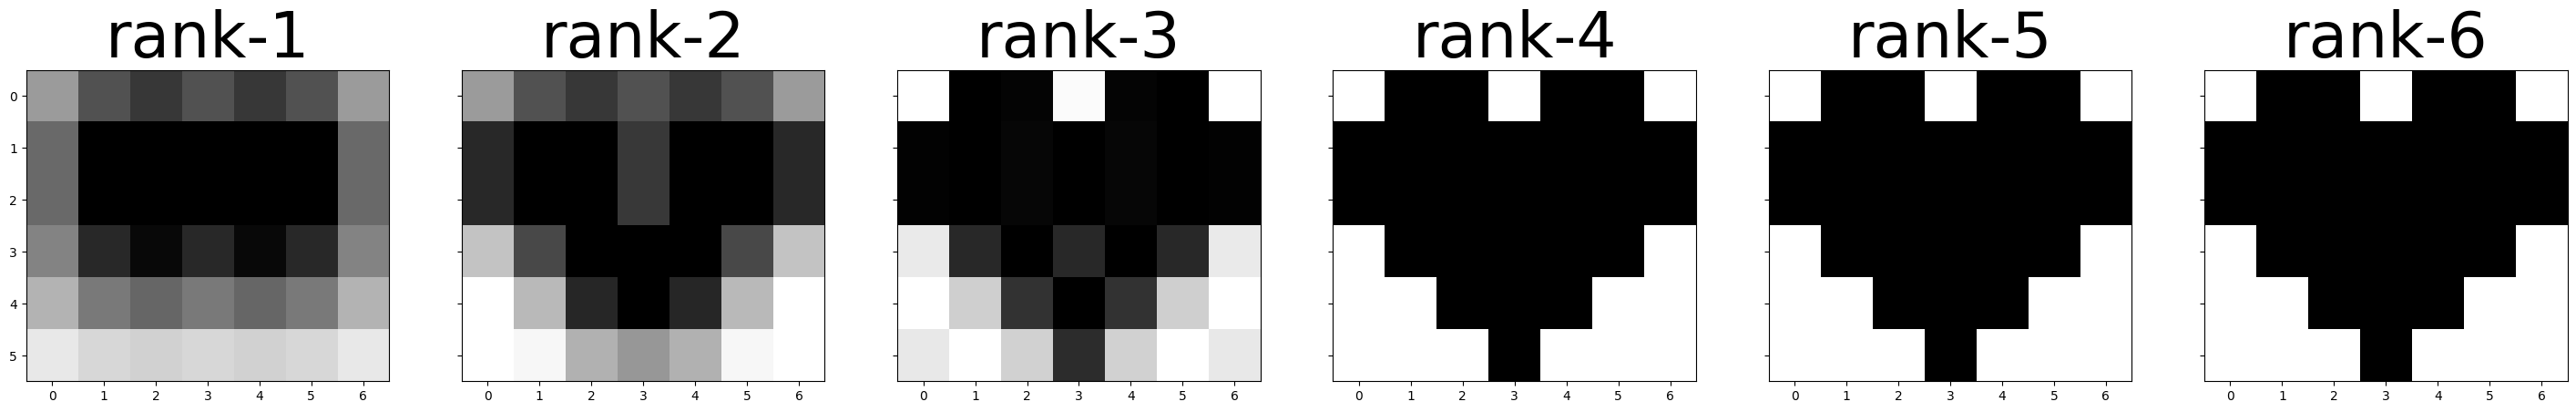

In [3]:
import numpy as np
from numpy.linalg import svd
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

def lowRankApproximation(u, s, v, m, n, r, k):
    if k > r:
        print("k > rank A!")
        return
    # Blank matrix that will hold approximated values
    approximation = np.zeros((m, n))
    for K in range(k):
        # sigma_k * u_k * v^T_k
        term = s[0, K] * u[:, K] @ v[K]
        approximation += term
        # print(k+1, term)
    return approximation

# Heart shape (grayscale)
A = np.array([[0,1,1,0,1,1,0],
              [1,1,1,1,1,1,1],
              [1,1,1,1,1,1,1],
              [0,1,1,1,1,1,0],
              [0,0,1,1,1,0,0],
              [0,0,0,1,0,0,0],
             ])
U, S, V = svd(A)

# Convert all to matrices
U, S, V = np.asmatrix(U), np.asmatrix(S), np.asmatrix(V)

# Some dimensions that will be useful
m = U.shape[0]
n = V.shape[0]
r = S.shape[1]

# Diagonalize all singular values of A
D = np.zeros((r, r))
np.fill_diagonal(D, S)

# Create Sigma, which is of size MxN and contains D
Sigma = np.zeros((m, n))
Sigma[:n, :m] = D

# SVD Formula: A = U * Sigma * V^T (@ = matrix mult symbol)
SVD = U @ Sigma @ V
"""
print(U)
print(Sigma)
print(V)
print(SVD)
"""

# rank-K approximation, where k <= r
fig, axes = plt.subplots(figsize = (m*m, m), nrows = 1, ncols = m, sharex=True, sharey=True)
for i, ax in zip(range(r), axes):
    approx = lowRankApproximation(U, S, V, m, n, r, i+1)
    ax.imshow(approx, cmap='gray_r', vmin=0, vmax=1)
    ax.set_title(f'rank-{i+1}', fontsize=50)
    
plt.show()

# Low-Rank Approximation of an RGB Image

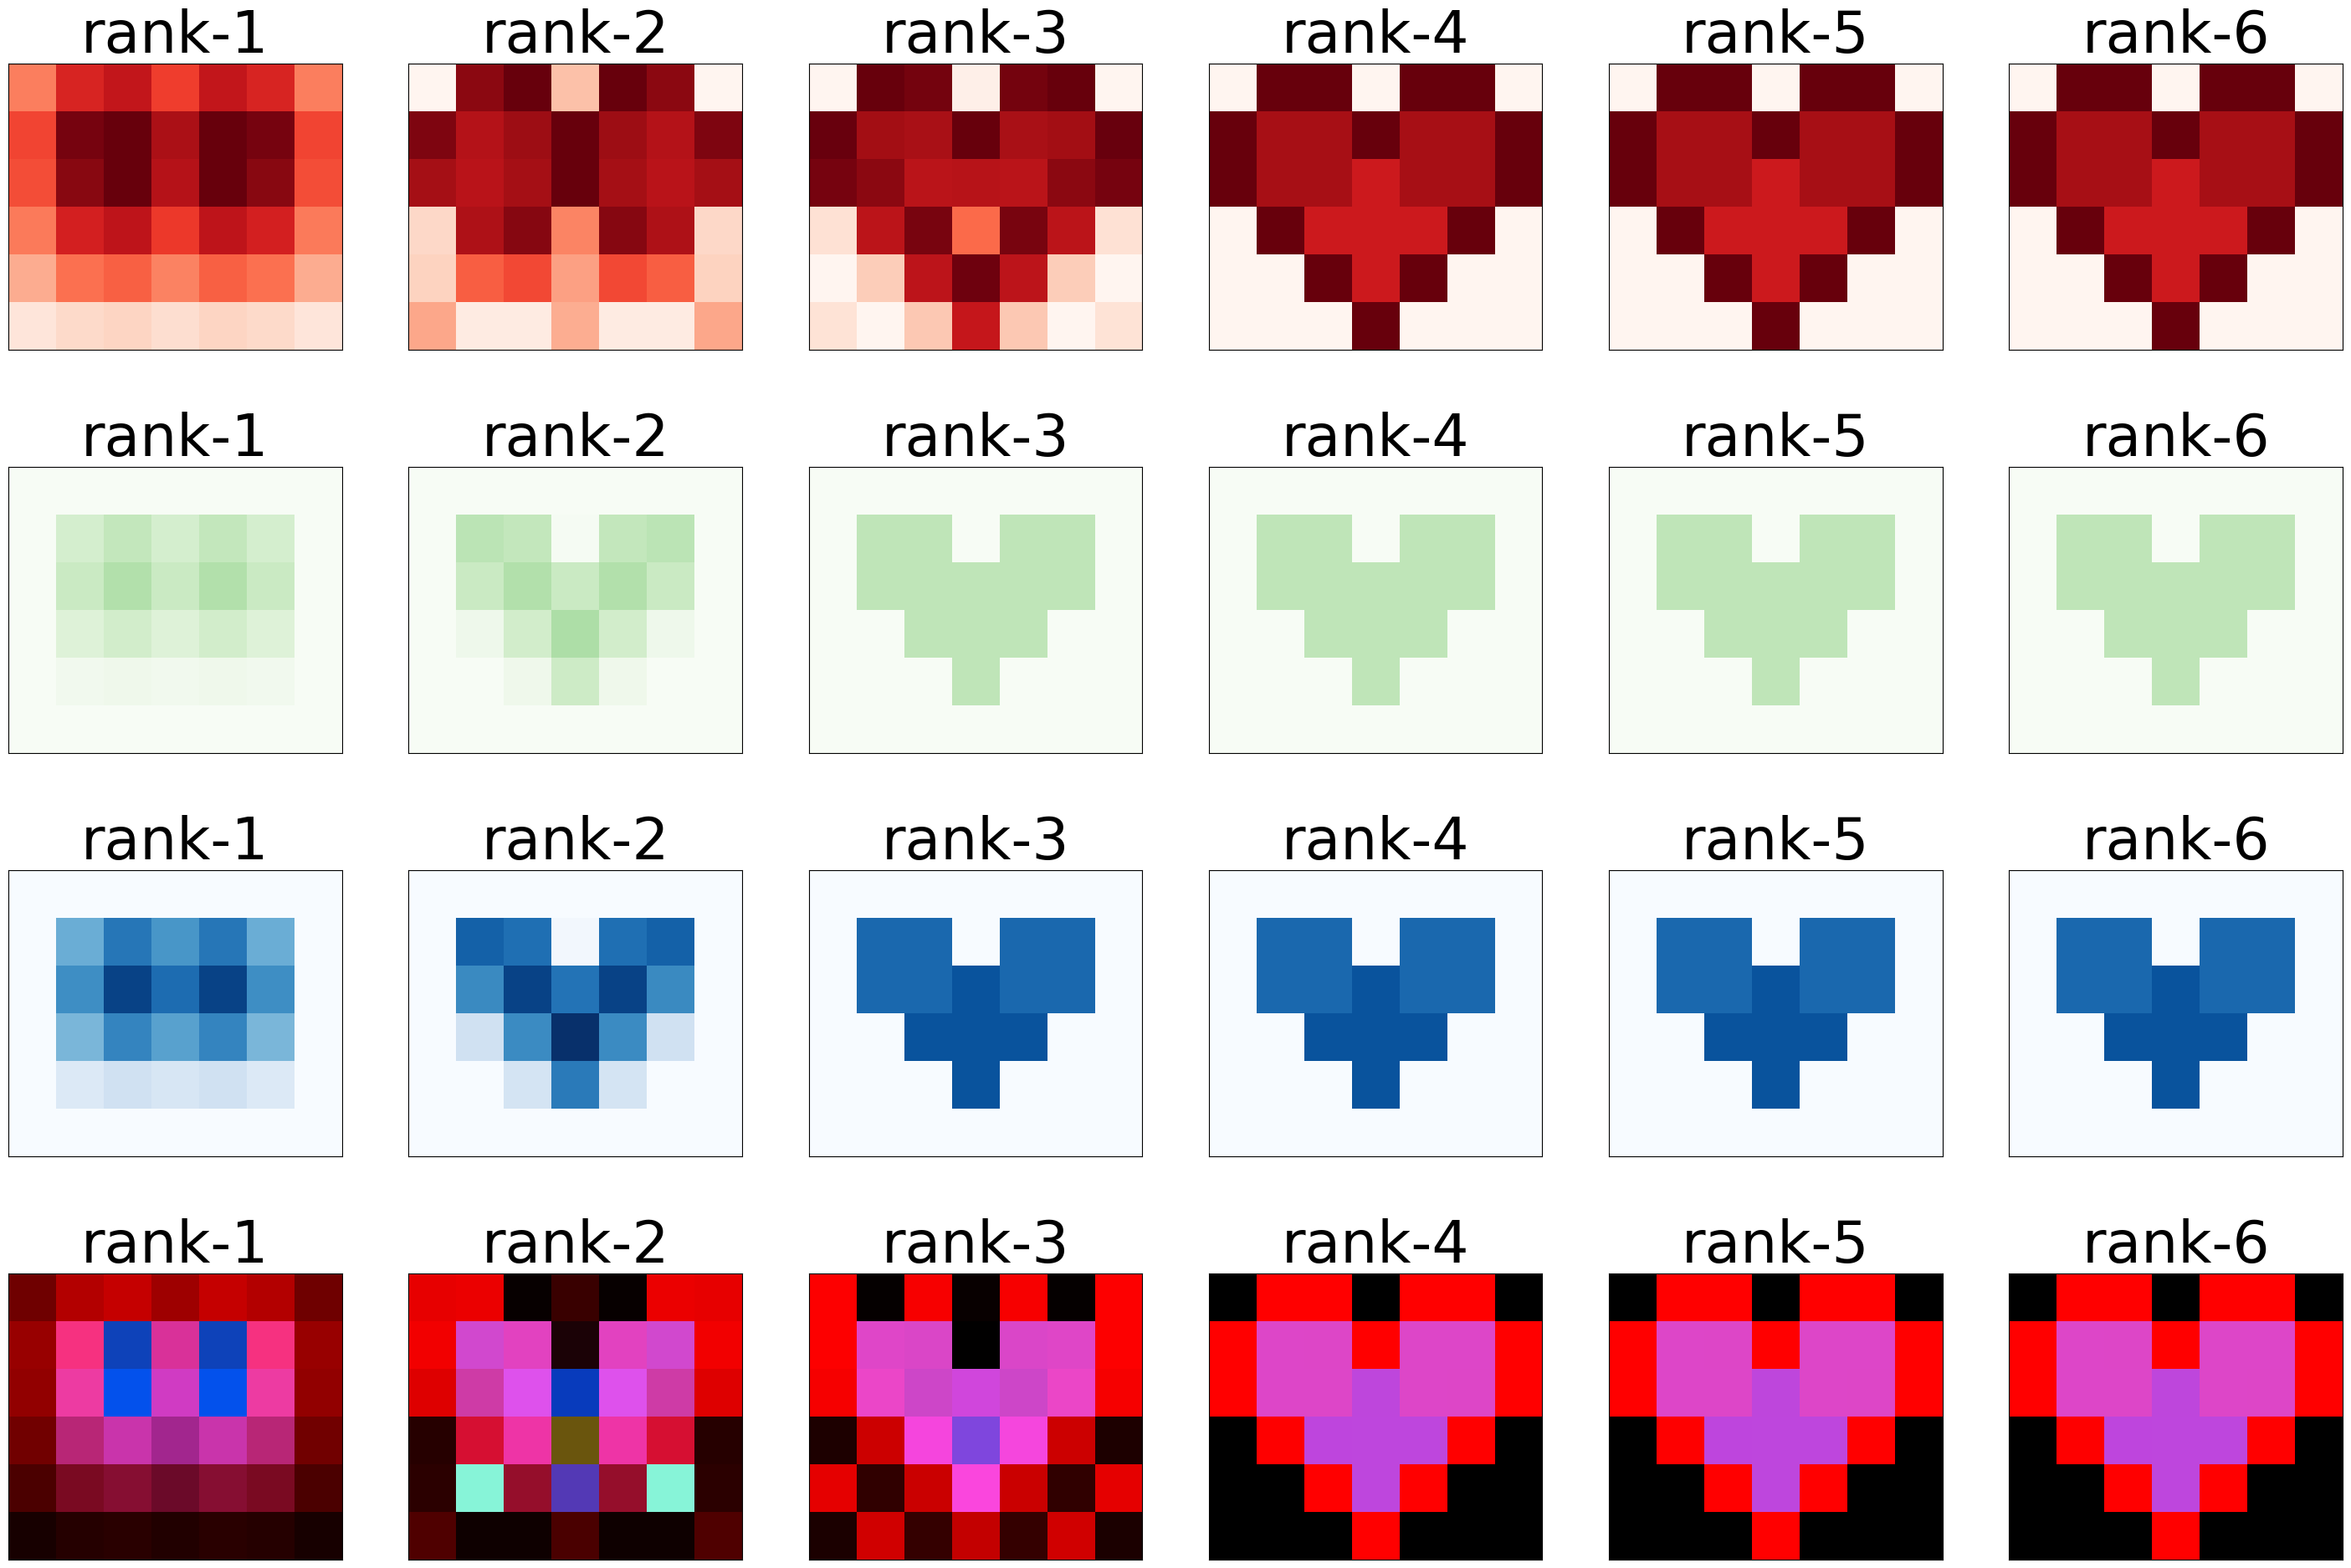

In [4]:
import numpy as np
from numpy.linalg import svd
import matplotlib.pyplot as plt
from PIL import Image

def lowRankApproximation(u, s, v, m, n, r, k):
    if k > r:
        return
    approximation = np.zeros((m, n))
    for K in range(k):
        approximation += s[0, K] * u[:, K] @ v[K]
    return approximation

# Heart shape (colors)
R = np.array([[0, 255, 255, 0, 255, 255, 0], 
              [255, 221, 221, 255, 221, 221, 255], 
              [255, 221, 221, 190, 221, 221, 255], 
              [0, 255, 190, 190, 190, 255, 0], 
              [0, 0, 255, 190, 255, 0, 0], 
              [0, 0, 0, 255, 0, 0, 0]
              ])
G = np.array([[0, 0, 0, 0, 0, 0, 0], 
              [0, 70, 70, 0, 70, 70, 0], 
              [0, 70, 70, 70, 70, 70, 0], 
              [0, 0, 70, 70, 70, 0, 0], 
              [0, 0, 0, 70, 0, 0, 0], 
              [0, 0, 0, 0, 0, 0, 0]])
B = np.array([[0, 0, 0, 0, 0, 0, 0], 
              [0, 200, 200, 0, 200, 200, 0], 
              [0, 200, 200, 221, 200, 200, 0],
              [0, 0, 221, 221, 221, 0, 0], 
              [0, 0, 0, 221, 0, 0, 0], 
              [0, 0, 0, 0, 0, 0, 0]])

m, n = R.shape
fig, axes = plt.subplots(figsize = (m*m, 4*m), nrows=4, ncols=m)
ALL = []

for color in range(3):
    colors = [R, G, B]
    cbars = {0:'Reds', 1:'Greens', 2:'Blues'}
    
    U, S, V = svd(colors[color])
    U, S, V = np.asmatrix(U), np.asmatrix(S), np.asmatrix(V)
    r = S.shape[1]

    ALL.append([])
    for i in range(r):
        ax = axes[color, i]
        approx = lowRankApproximation(U, S, V, m, n, r, i+1)
        ax.imshow(approx, cmap=cbars[color], vmin=0, vmax=255)
        ax.set_title(f'rank-{i+1}', fontsize=50)
        ax.set_xticks([])
        ax.set_yticks([])
        ALL[color].append(approx)

# Normalize matrices to unsigned 8-bit integer for each pixel (0-255)
red, green, blue = np.array(ALL[0]).astype(np.uint8), np.array(ALL[1]).astype(np.uint8), np.array(ALL[2]).astype(np.uint8)
for i in range(r):
    ax = axes[-1, i]
    
    # Extract i_th frame from each channel
    r = Image.fromarray(red[i], mode='L')
    g = Image.fromarray(green[i], mode='L')
    b = Image.fromarray(blue[i], mode='L')

    # Display merged image
    ax.imshow(Image.merge('RGB', (r, g, b)))
    ax.set_title(f'rank-{i+1}', fontsize=50)
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()

# Low-Rank Approximation of Large RGB Images

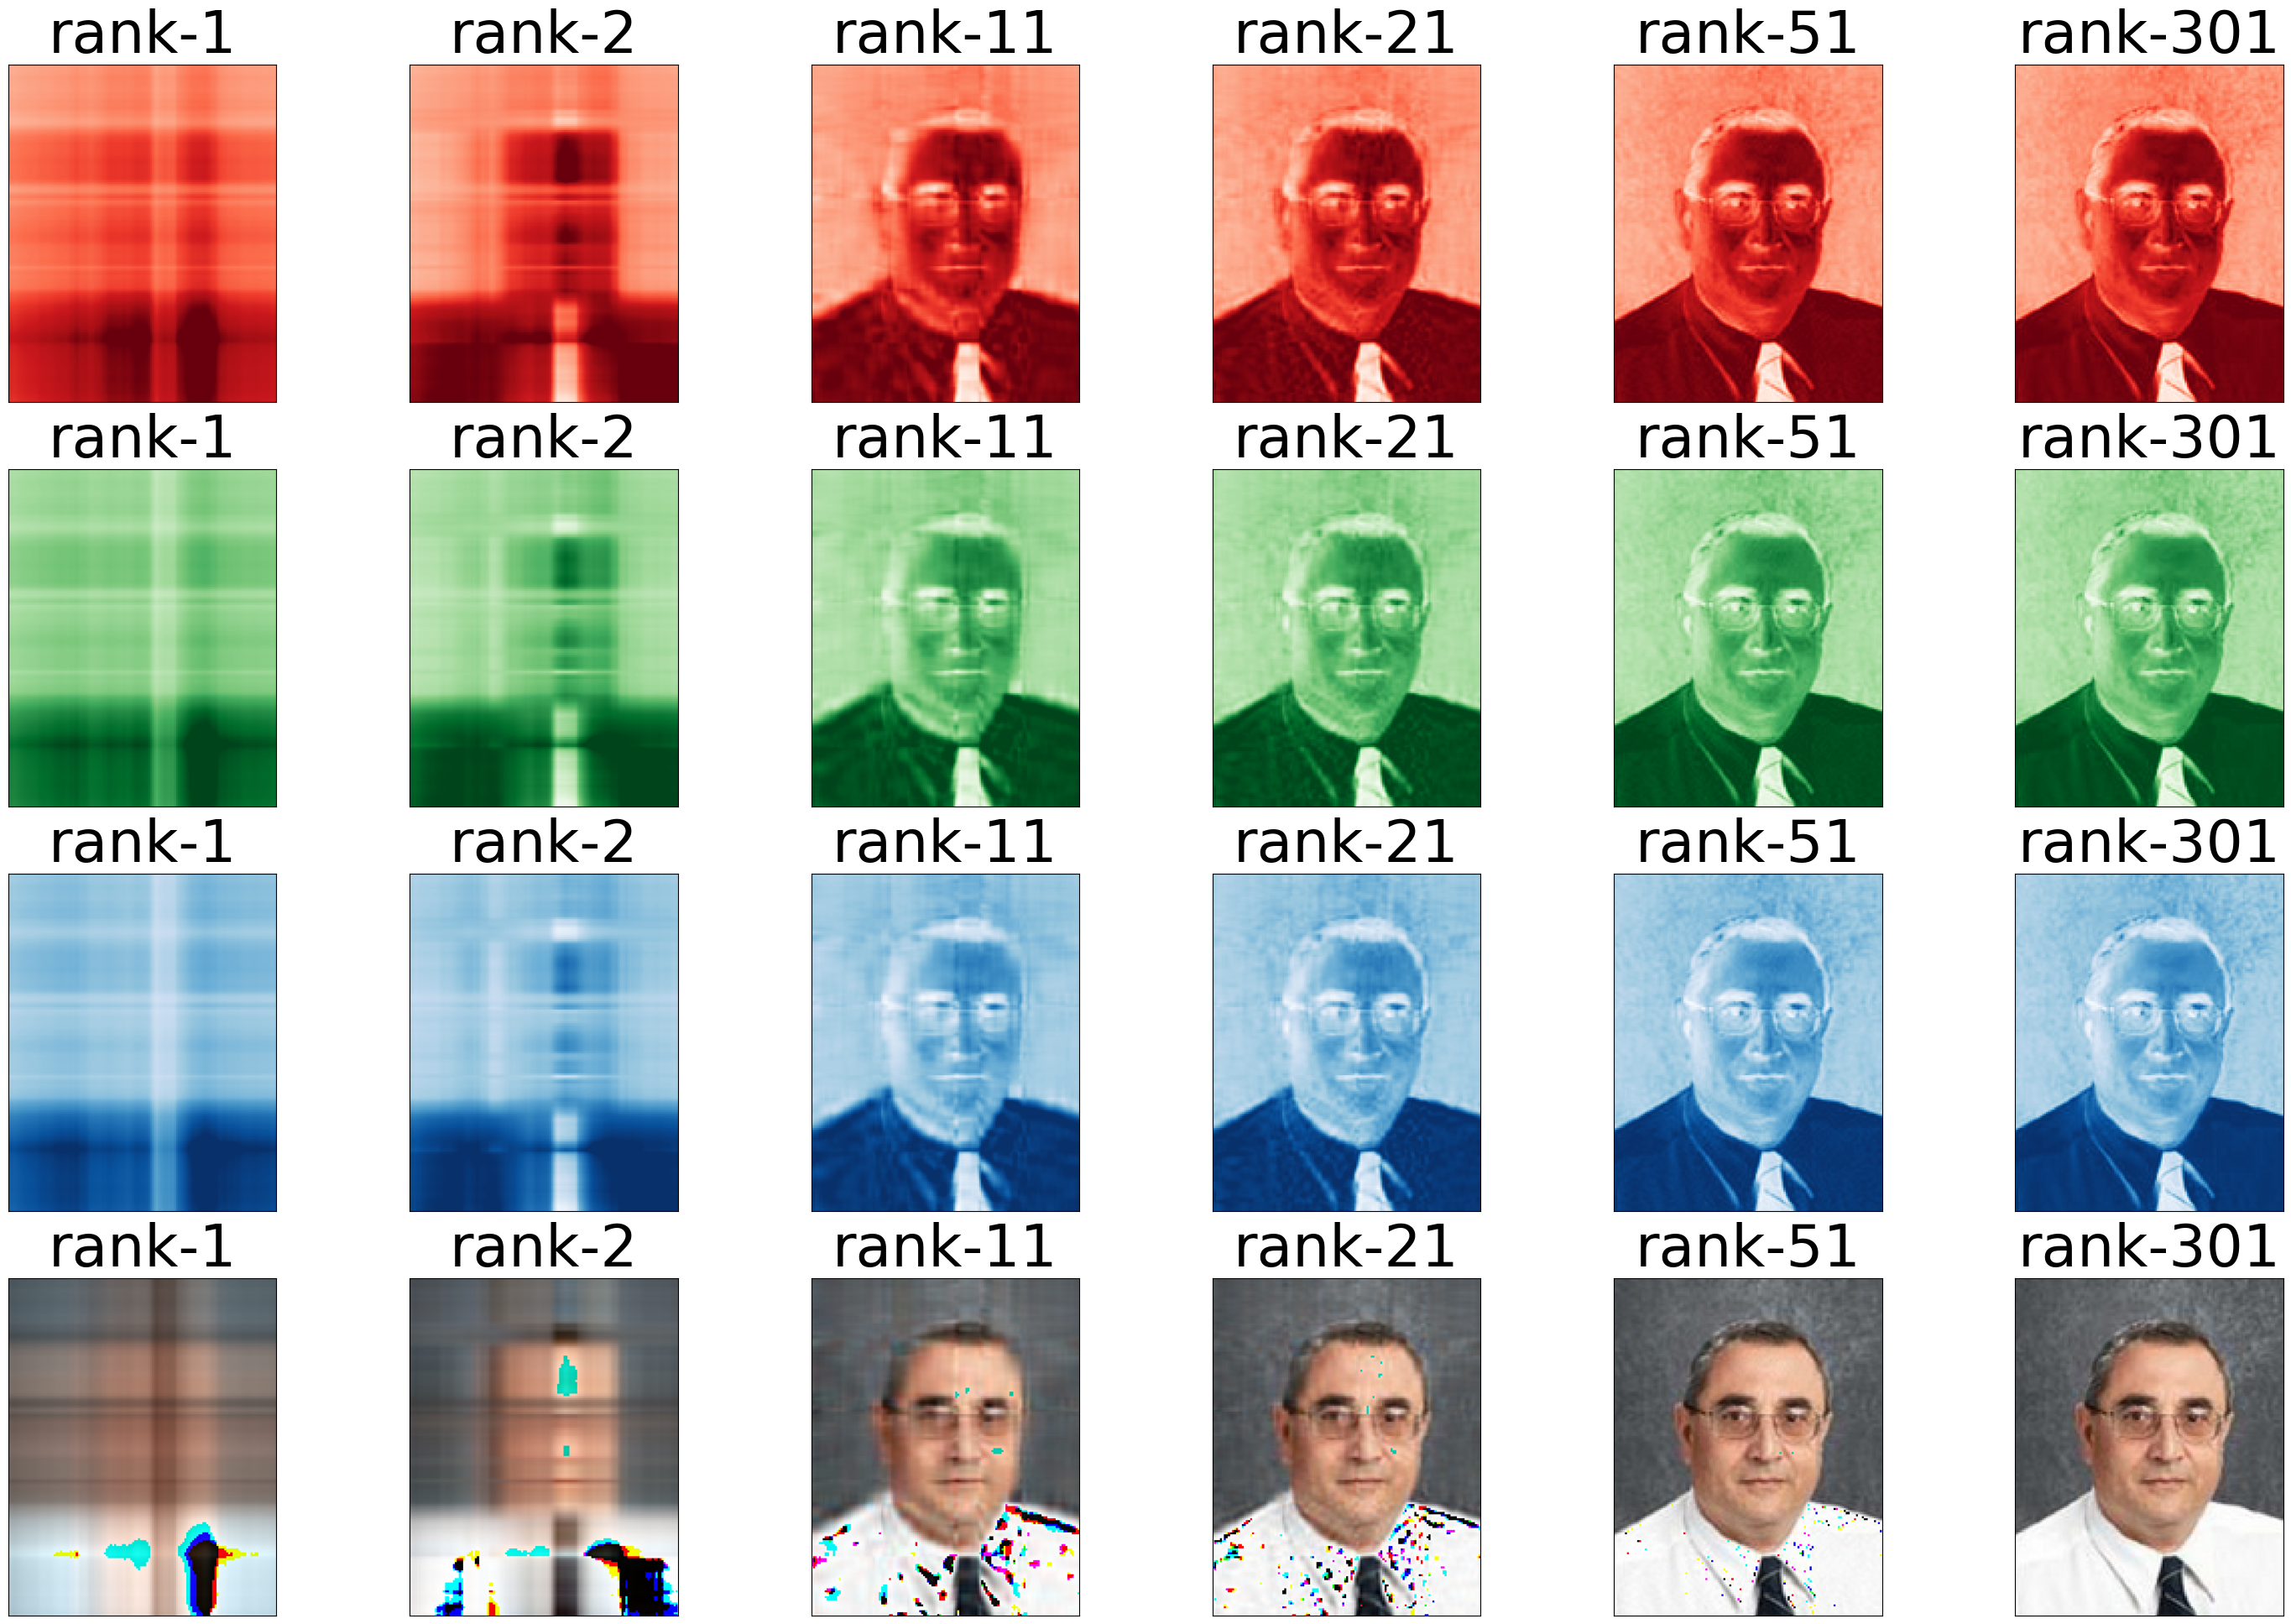

In [6]:
import numpy as np
from numpy.linalg import svd
import matplotlib.pyplot as plt
from PIL import Image

def lowRankApproximation(u, s, v, m, n, r, k):
    if k > r:
        return
    approximation = np.zeros((m, n))
    for K in range(k):
        approximation += s[0, K] * u[:, K] @ v[K]
    return approximation

img = Image.open('data/enzopaterno.png')
R, G, B = np.array(img.convert('RGB').split())

# selected_k = [0, 1, 2, 5, 10, 20, 50, 150, 300, 550]
selected_k = [0, 1, 10, 20, 50, 300]

ALL = []
m, n = R.shape
fig, axes = plt.subplots(figsize = (36, 24), nrows=4, ncols=len(selected_k))

for color in range(3):
    colors = [R, G, B]
    cbars = {0:'Reds', 1:'Greens', 2:'Blues'}
    
    U, S, V = svd(colors[color])
    U, S, V = np.asmatrix(U), np.asmatrix(S), np.asmatrix(V)
    r = S.shape[1]

    ALL.append([])
    for i in range(len(selected_k)):
        ax = axes[color, i]
        approx = lowRankApproximation(U, S, V, m, n, r, selected_k[i]+1)
        ax.imshow(approx, cmap=cbars[color], vmin=0, vmax=255)
        ax.set_title(f'rank-{selected_k[i]+1}', fontsize=50)
        ax.set_xticks([])
        ax.set_yticks([])
        ALL[color].append(approx)

red, green, blue = np.array(ALL[0]).astype(np.uint8), np.array(ALL[1]).astype(np.uint8), np.array(ALL[2]).astype(np.uint8)
for i in range(len(selected_k)):
    ax = axes[-1, i]
    r = Image.fromarray(red[i], mode='L')
    g = Image.fromarray(green[i], mode='L')
    b = Image.fromarray(blue[i], mode='L')

    ax.imshow(Image.merge('RGB', (r, g, b)))
    ax.set_title(f'rank-{selected_k[i]+1}', fontsize=50)
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()